<a href="https://colab.research.google.com/github/saeidsaadatigero/AI_ML_Computer-Vision/blob/main/21_Liner_Regression_With_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# ============================================
# 📘 درس امشب: رگرسیون خطی با PyTorch
# نویسنده: سعید + مربی هوشمند 🤖
# هدف: درک رابطه y = w*x + b و آموزش مدل با Gradient Descent
# ============================================

# اگر PyTorch نصب نیست (در Colab نیازی نیست)
# !pip install torch matplotlib
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

print("✅ محیط آماده است — شروع کنیم!")

✅ محیط آماده است — شروع کنیم!


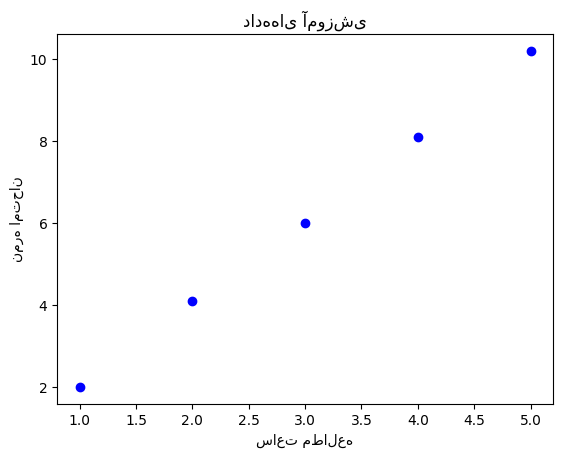

In [ ]:

# ============================================
# مرحله ۱: داده‌ی آموزشی مصنوعی
# --------------------------------------------
# فرض کن می‌خواهیم رابطه بین ساعت مطالعه (x)
# و نمره‌ی امتحان (y) را یاد بگیریم.
# ============================================

x = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])   # ساعت مطالعه
y = torch.tensor([[2.0], [4.1], [6.0], [8.1], [10.2]])  # نمرات واقعی

plt.scatter(x, y, color='blue')
plt.xlabel('ساعت مطالعه')
plt.ylabel('نمره امتحان')
plt.title('داده‌های آموزشی')
plt.show()

In [ ]:

# ============================================
# مرحله ۲: تعریف مدل خطی (Linear Regression)
# --------------------------------------------
# مدل PyTorch آماده است: nn.Linear(in_features, out_features)
# این مدل خودش w و b را می‌سازد و یاد می‌گیرد.
# ============================================

model = nn.Linear(in_features=1, out_features=1)

# تابع خطا (Mean Squared Error)
criterion = nn.MSELoss()

# بهینه‌ساز (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print("✅ مدل آماده است.")
print("وزن اولیه:", list(model.parameters())[0].item())
print("بایاس اولیه:", list(model.parameters())[1].item())

✅ مدل آماده است.
وزن اولیه: 0.3850911855697632
بایاس اولیه: 0.8551821708679199


In [ ]:

# ============================================
# مرحله ۳: آموزش مدل
# --------------------------------------------
# در هر epoch:
#   1. پیش‌بینی (forward)
#   2. محاسبه‌ی خطا
#   3. محاسبه‌ی گرادیان (backward)
#   4. به‌روزرسانی وزن‌ها
# ============================================

epochs = 300
for epoch in range(epochs):
    # مرحله پیش‌بینی
    y_pred = model(x)

    # محاسبه‌ی خطا
    loss = criterion(y_pred, y)

    # صفر کردن گرادیان‌ها برای جلوگیری از انباشت
    optimizer.zero_grad()

    # محاسبه‌ی گرادیان‌ها
    loss.backward()

    # به‌روزرسانی پارامترها
    optimizer.step()

    # چاپ وضعیت هر 50 تکرار
    if (epoch + 1) % 50 == 0:
        [w, b] = model.parameters()
        print(f"Epoch [{epoch+1}/300]  Loss: {loss.item():.4f}  w={w.item():.3f}  b={b.item():.3f}")

print("✅ آموزش مدل تمام شد.")

Epoch [50/300]  Loss: 0.2088  w=1.746  b=1.021
Epoch [100/300]  Loss: 0.1495  w=1.792  b=0.856
Epoch [150/300]  Loss: 0.1072  w=1.830  b=0.716
Epoch [200/300]  Loss: 0.0771  w=1.863  b=0.599
Epoch [250/300]  Loss: 0.0557  w=1.891  b=0.499
Epoch [300/300]  Loss: 0.0404  w=1.914  b=0.415
✅ آموزش مدل تمام شد.


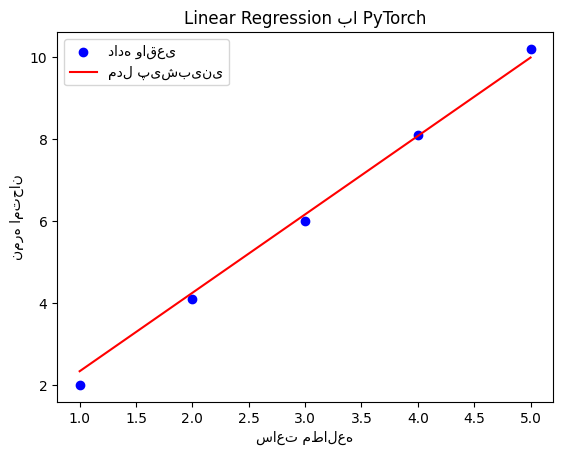

In [ ]:

# ============================================
# مرحله ۴: نمایش نتیجه و نمودار
# --------------------------------------------
# پیش‌بینی روی داده‌های آموزشی و رسم خط رگرسیون
# ============================================

predicted = model(x).detach()  # detach برای جلوگیری از محاسبه‌ی گرادیان

plt.scatter(x, y, color='blue', label='داده واقعی')
plt.plot(x, predicted, color='red', label='مدل پیش‌بینی')
plt.xlabel('ساعت مطالعه')
plt.ylabel('نمره امتحان')
plt.legend()
plt.title('Linear Regression با PyTorch')
plt.show()

In [ ]:

# ============================================
# مرحله ۵: پیش‌بینی جدید
# --------------------------------------------
# ببینیم برای 6 ساعت مطالعه، مدل چه نمره‌ای پیش‌بینی می‌کند؟
# ============================================

x_test = torch.tensor([[6.0]])
y_pred = model(x_test)
print(f"🔹 پیش‌بینی مدل برای 6 ساعت مطالعه: {y_pred.item():.2f}")

🔹 پیش‌بینی مدل برای 6 ساعت مطالعه: 11.90
